In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 결측값 파악
train_df.shape

(891, 12)

In [10]:
test_df.shape

(418, 11)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [16]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [44]:
# 생존한 사람, 사망한 사람의 수 확인하기

survival = train_df.Survived.sum()
n_survival = train_df.shape[0] - survival
n_survival

# pandas의 sum() 메서드 사용하여 Survival컬럼 값의 합으로 생존자의 수를 구하고 
#  train 데이터프레임의 전체 레코드 수에서 survival의 값을 빼어 
# 사망한 사람의 수를 구한다.​

549

In [48]:
# 각 클래스('Pclass')별 탑승객 분포 확인하기
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [50]:
# 성('Sex')별 탑승객 분표 확인하기
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [52]:
# 탑승 위치('Embarked') 별 탑승객 분표 확인하기
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [60]:
# 'Embarked' 필드의 결측치는 값이 가장 많은 'S'로 할당하기
train_df['Embaked'] = train_df['Embarked'].fillna('S')
train_df['Embaked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embaked, Length: 891, dtype: object

In [64]:
# 'Age' 필드의 결측치는 값이 중간값으로 할당하기
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [74]:
# 'Name'필드에서 신분을 나타내는 단어를 뽑아서 'Title' 필드에 할당하기
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_df['Title']

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ranes\AppData\Local\Temp\ipykernel_15052\3210912380.py:2: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [78]:
# 'Title' 필드의 카테고리를 6개의 항목으로 변경하기
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
train_df['Title'] = train_df['Title'].replace(['Jonkheer', 'Master'], 'Master')
train_df['Title'] = train_df['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
train_df['Title'] = train_df['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Miss'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mr'], 'Mr')

In [80]:
# 변수 y를 선언해서 학습할 목표변수(=종속변수)인 'Survived'필드값을 담기

y = train_df.Survived

In [84]:
# 나이('Age') 필드를 그룹핑하여 'AgeGroup'필드 생성하여 할당하기

bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bin, labels=group_names)
train_df['AgeGroup'].value_counts()

AgeGroup
YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

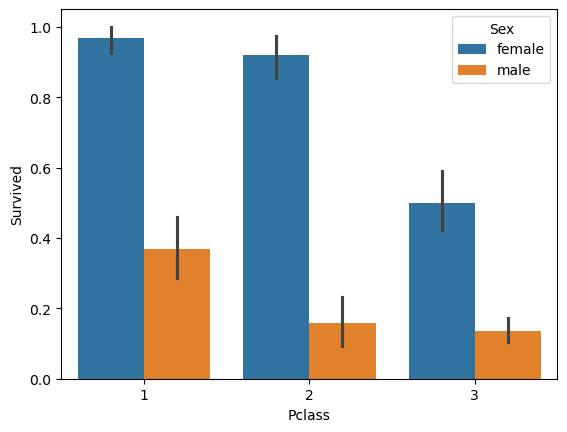

In [86]:
# 데이터 시각화 실습
# 학습 데이터셋(train)의 데이터 분포확인하기

sns.barplot(x='Pclass', y = 'Survived', hue='Sex', data=train_df)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

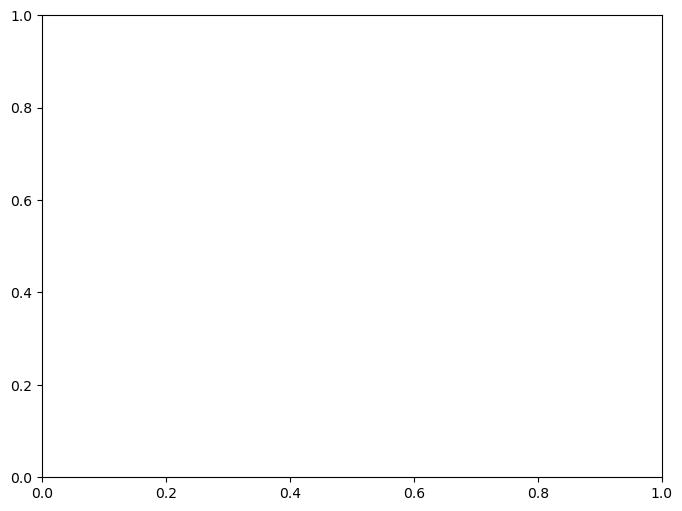

In [96]:
# 전체 변수의 correlation에 대해 히트맵 그리기
plt.subplots(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, linewidths=2)
plt.subplots(figsize=(8,6))
sns.heatmap(train.corr(),annot=True,linewidths=2)